## Step 1. Importing libraries and data sets

In [21]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import datetime
from datetime import date
import folium
import json

In [2]:
path=r'/Users/Dimitris/Desktop/CF Data Analytics/Data Immersion/Achievement 6/02 Data'

In [3]:
# Import the “df_1701_1912.pkl” file into Jupyter as df_1701_1912

df_1701_1912 = pd.read_pickle(os.path.join(path, 'Prepared Data', 'df_1701_1912.pkl'))

In [4]:
df_1701_1912.shape

(50838483, 15)

In [5]:
df_1701_1912.columns

Index(['trip_duration', 'start_time', 'stop_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'birth_year', 'gender'],
      dtype='object')

In [123]:
df_1701_1912.dtypes

trip_duration                int64
start_time                  object
stop_time                   object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
birth_year                 float64
gender                       int64
dtype: object

In [7]:
df_1701_1912.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226.0,W 82 St & Central Park West,40.782750,-73.971370,3165.0,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263.0,Cooper Square & E 7 St,40.729236,-73.990868,498.0,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143.0,5 Ave & E 78 St,40.776829,-73.963888,3152.0,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143.0,5 Ave & E 78 St,40.776829,-73.963888,3152.0,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143.0,5 Ave & E 78 St,40.776829,-73.963888,3152.0,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0


### Further data wrangling

In [8]:
# Create a sample of the dataframe - The current size is too large to work on my personal computer so I will create
# sample 25% the size of the dataframe and work on that.

rate = 4
df_sub = df_1701_1912[::rate]
df_sub.shape

(12709621, 15)

In [9]:
# Change "trip_duration" column format from seconds to minutes

df_sub["trip_duration"] = df_sub["trip_duration"]/60

/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_68189/1769597753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["trip_duration"] = df_sub["trip_duration"]/60


In [113]:
# Add day of the week based on start_time column

df_sub['day_of_week'] = df_sub['start_time'].apply(lambda time: time.dayofweek)

/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_68189/4256918687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['day_of_week'] = df_sub['start_time'].apply(lambda time: time.dayofweek)


In [116]:
df_sub['day_of_week'].value_counts(dropna = False)

2    1978555
1    1918836
3    1907495
4    1871204
0    1807954
5    1622931
6    1463204
Name: day_of_week, dtype: int64

In [118]:
# Replace values in day_of_week with names of weekdays

df_sub['day_of_week'] = df_sub['day_of_week'].map({0: 'Mon.',1: 'Tues.',2: 'Wed.',3: 'Thurs.',4: 'Fri.', 5: 'Sat.', 6: 'Sun.'})

/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_68189/823941161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['day_of_week'] = df_sub['day_of_week'].map({0: 'Mon.',1: 'Tues.',2: 'Wed.',3: 'Thurs.',4: 'Fri.', 5: 'Sat.', 6: 'Sun.'})


In [120]:
# Add hour_of_day based on start_time column

df_sub['hour_of_day'] = df_sub['start_time'].dt.hour

/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_68189/3376338462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['hour_of_day'] = df_sub['start_time'].dt.hour


In [121]:
df_sub['hour_of_day'].value_counts(dropna = False)

17    1228083
18    1160955
8     1008044
16     894941
19     807943
9      799818
15     773201
14     734678
13     712906
12     682949
11     592757
7      575948
10     567488
20     550381
21     386425
22     290272
6      273165
23     191338
0      110741
5       81917
1       61985
2       36697
4       24392
3       23155
Name: hour_of_day, dtype: int64

In [134]:
# Find most popular start station based on start_station_name column

df_sub['start_station_name'].value_counts(dropna = False)

Pershing Square North        107661
E 17 St & Broadway            78420
Broadway & E 22 St            75298
W 21 St & 6 Ave               74013
West St & Chambers St         69132
                              ...  
Somers St & Broadway              2
NYCBS Depot - FAR                 2
LPI Facility                      1
Madison St & Woodward Ave         1
Fairview Ave & Linden St          1
Name: start_station_name, Length: 1082, dtype: int64

<AxesSubplot:xlabel='start_station_id', ylabel='Count'>

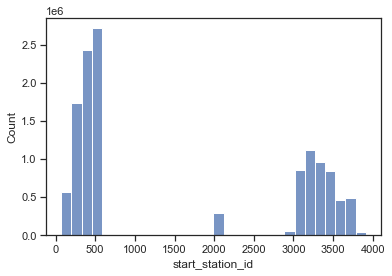

In [145]:
# Create a histogram the "start_station_id" column

sns.histplot(df_sub['start_station_id'], bins = 30)

In [135]:
# Find most popular end station based on end_station_name column

df_sub['end_station_name'].value_counts(dropna = False)

Pershing Square North       107241
E 17 St & Broadway           81494
Broadway & E 22 St           80249
W 21 St & 6 Ave              75581
West St & Chambers St        74292
                             ...  
LPI Facility                     1
E 15 St & Irving Pl              1
North St                         1
Apache                           1
Fairview Ave & Linden St         1
Name: end_station_name, Length: 1097, dtype: int64

<AxesSubplot:xlabel='end_station_id', ylabel='Count'>

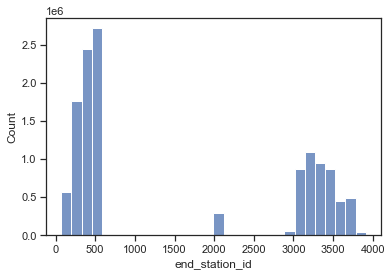

In [146]:
# Create a histogram the "end_station_id" column

sns.histplot(df_sub['end_station_id'], bins = 30)

In [124]:
df_sub.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,birth_year,gender,age,age_group_loc,trip_duration_range_loc,station_users,day_of_week,hour_of_day
0,11.333333,2017-01-01 00:00:21,2017-01-01 00:11:41,3226.0,W 82 St & Central Park West,40.782750,-73.971370,3165.0,Central Park West & W 72 St,40.775794,...,25542,Subscriber,1965.0,F,52.0,Middle-aged,Short,Less busy,Sun.,0
4,10.350000,2017-01-01 00:01:25,2017-01-01 00:11:47,3143.0,5 Ave & E 78 St,40.776829,-73.963888,3152.0,3 Ave & E 71 St,40.768737,...,26819,Customer,NaN,N/A,NaN,NaN,Short,Less busy,Sun.,0
8,4.250000,2017-01-01 00:05:47,2017-01-01 00:10:02,430.0,York St & Jay St,40.701485,-73.986569,242.0,Carlton Ave & Flushing Ave,40.697787,...,25041,Subscriber,1989.0,M,28.0,Adult,Very short,Busy,Sun.,0
12,33.416667,2017-01-01 00:05:57,2017-01-01 00:39:23,524.0,W 43 St & 6 Ave,40.755273,-73.983169,3325.0,E 95 St & 3 Ave,40.784903,...,17171,Subscriber,1992.0,M,25.0,Adult,Average,Busy,Sun.,0
16,14.983333,2017-01-01 00:09:20,2017-01-01 00:24:19,515.0,W 43 St & 10 Ave,40.760094,-73.994618,3428.0,8 Ave & W 16 St,40.740983,...,15597,Subscriber,1970.0,M,47.0,Middle-aged,Short,Busy,Sun.,0


In [125]:
df_sub.dtypes

trip_duration                     float64
start_time                 datetime64[ns]
stop_time                  datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
birth_year                        float64
gender                             object
age                               float64
age_group_loc                      object
trip_duration_range_loc            object
station_users                      object
day_of_week                        object
hour_of_day                         int64
dtype: object

In [78]:
# Run a check for missing values in df_sub dataframe

df_sub.isnull().sum()

trip_duration                   0
start_time                      0
stop_time                       0
start_station_id              681
start_station_name              0
start_station_latitude          0
start_station_longitude         0
end_station_id                681
end_station_name                0
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
birth_year                 406862
gender                          0
age                        406862
age_group_loc              406862
trip_duration_range_loc         0
dtype: int64

In [12]:
# Replace value in gender '0', 1' and '2' with 'M' and 'F'

df_sub['gender'] = df_sub['gender'].map({2: 'F', 1: 'M', 0: 'N/A'})

/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_68189/4061813753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['gender'] = df_sub['gender'].map({2: 'F', 1: 'M', 0: 'N/A'})


In [119]:
df_sub

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,age,age_group_loc,trip_duration_range_loc,station_users,day_of_week
0,11.333333,2017-01-01 00:00:21.000,2017-01-01 00:11:41.000,3226.0,W 82 St & Central Park West,40.782750,-73.971370,3165.0,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,F,52.0,Middle-aged,Short,Less busy,Sun.
4,10.350000,2017-01-01 00:01:25.000,2017-01-01 00:11:47.000,3143.0,5 Ave & E 78 St,40.776829,-73.963888,3152.0,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,N/A,NaN,NaN,Short,Less busy,Sun.
8,4.250000,2017-01-01 00:05:47.000,2017-01-01 00:10:02.000,430.0,York St & Jay St,40.701485,-73.986569,242.0,Carlton Ave & Flushing Ave,40.697787,-73.973736,25041,Subscriber,1989.0,M,28.0,Adult,Very short,Busy,Sun.
12,33.416667,2017-01-01 00:05:57.000,2017-01-01 00:39:23.000,524.0,W 43 St & 6 Ave,40.755273,-73.983169,3325.0,E 95 St & 3 Ave,40.784903,-73.950503,17171,Subscriber,1992.0,M,25.0,Adult,Average,Busy,Sun.
16,14.983333,2017-01-01 00:09:20.000,2017-01-01 00:24:19.000,515.0,W 43 St & 10 Ave,40.760094,-73.994618,3428.0,8 Ave & W 16 St,40.740983,-74.001702,15597,Subscriber,1970.0,M,47.0,Middle-aged,Short,Busy,Sun.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955187,22.616667,2019-12-31 23:51:18.276,2020-01-01 00:13:56.184,2021.0,W 45 St & 8 Ave,40.759291,-73.988597,2021.0,W 45 St & 8 Ave,40.759291,-73.988597,21526,Subscriber,1991.0,F,28.0,Adult,Average,Not busy,Tues.
955191,7.850000,2019-12-31 23:52:57.231,2020-01-01 00:00:48.247,3151.0,E 81 St & York Ave,40.772838,-73.949892,3362.0,Madison Ave & E 82 St,40.778131,-73.960694,35174,Subscriber,1988.0,F,31.0,Adult,Short,Less busy,Tues.
955195,22.633333,2019-12-31 23:53:18.074,2020-01-01 00:15:56.948,380.0,W 4 St & 7 Ave S,40.734011,-74.002939,3740.0,W Broadway & W Houston St,40.726378,-74.000472,30028,Subscriber,1961.0,M,58.0,Middle-aged,Average,Busy,Tues.
955199,29.500000,2019-12-31 23:54:53.088,2020-01-01 00:24:23.209,3306.0,10 St & 7 Ave,40.666208,-73.981999,3416.0,7 Ave & Park Pl,40.677615,-73.973243,28153,Customer,1977.0,M,42.0,Middle-aged,Average,Less busy,Tues.


In [122]:
# Save changes to column gender

df_sub = df_sub

In [28]:
# Change start_time and stop_time data type

df_sub[['start_time','stop_time']] = df_sub[['start_time','stop_time']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')

/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_68189/1080006552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub[['start_time','stop_time']] = df_sub[['start_time','stop_time']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')


In [61]:
df_sub.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,age,age_group_loc,trip_duration_range_loc
0,11.333333,2017-01-01 00:00:21,2017-01-01 00:11:41,3226.0,W 82 St & Central Park West,40.782750,-73.971370,3165.0,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,F,52.0,Middle-aged,Average
4,10.350000,2017-01-01 00:01:25,2017-01-01 00:11:47,3143.0,5 Ave & E 78 St,40.776829,-73.963888,3152.0,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,N/A,NaN,NaN,Average
8,4.250000,2017-01-01 00:05:47,2017-01-01 00:10:02,430.0,York St & Jay St,40.701485,-73.986569,242.0,Carlton Ave & Flushing Ave,40.697787,-73.973736,25041,Subscriber,1989.0,M,28.0,Adult,Very short
12,33.416667,2017-01-01 00:05:57,2017-01-01 00:39:23,524.0,W 43 St & 6 Ave,40.755273,-73.983169,3325.0,E 95 St & 3 Ave,40.784903,-73.950503,17171,Subscriber,1992.0,M,25.0,Adult,Average
16,14.983333,2017-01-01 00:09:20,2017-01-01 00:24:19,515.0,W 43 St & 10 Ave,40.760094,-73.994618,3428.0,8 Ave & W 16 St,40.740983,-74.001702,15597,Subscriber,1970.0,M,47.0,Middle-aged,Average


In [46]:
# Calculate age from birth_year column

df_sub['age'] = df_sub['start_time'].dt.year - df_sub['birth_year']

/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_68189/1879481320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['age'] = df_sub['start_time'].dt.year - df_sub['birth_year']


In [57]:
# Create age_group flag

df_sub.loc[df_sub['age'] > 60, 'age_group_loc'] = 'Older'
df_sub.loc[(df_sub['age'] >= 40) & (df_sub['age'] <= 60), 'age_group_loc'] = 'Middle-aged'
df_sub.loc[(df_sub['age'] >= 18) & (df_sub['age'] < 40), 'age_group_loc'] = 'Adult'
df_sub.loc[df_sub['age'] < 18, 'age_group_loc'] = 'Underage'

In [72]:
# Create trip_duration flag

df_sub.loc[df_sub['trip_duration'] > 180 , 'trip_duration_range_loc'] = 'Very long'
df_sub.loc[(df_sub['trip_duration'] > 60 ) & (df_sub['trip_duration'] <= 180), 'trip_duration_range_loc'] = 'Long'
df_sub.loc[(df_sub['trip_duration'] >= 15) & (df_sub['trip_duration'] <= 60), 'trip_duration_range_loc'] = 'Average'
df_sub.loc[(df_sub['trip_duration'] > 5) & (df_sub['trip_duration'] < 15), 'trip_duration_range_loc'] = 'Short'
df_sub.loc[df_sub['trip_duration'] <= 5, 'trip_duration_range_loc'] = 'Very short'

In [95]:
# Create start_station use flag

df_sub.loc[(df_sub['start_station_id'] >= 250) & (df_sub['start_station_id'] < 550), 'station_users'] = 'Busy'
df_sub.loc[(df_sub['start_station_id'] >= 150) & (df_sub['start_station_id'] < 250), 'station_users'] = 'Less busy'
df_sub.loc[(df_sub['start_station_id'] >= 3000) & (df_sub['start_station_id'] < 3400), 'station_users'] = 'Less busy'
df_sub.loc[(df_sub['start_station_id'] >= 0) & (df_sub['start_station_id'] < 150), 'station_users'] = 'Not busy'
df_sub.loc[(df_sub['start_station_id'] >= 550) & (df_sub['start_station_id'] < 3000), 'station_users'] = 'Not busy'
df_sub.loc[(df_sub['start_station_id'] >= 3400) & (df_sub['start_station_id'] < 5000), 'station_users'] = 'Not busy'

In [97]:
df_sub['station_users'].value_counts(dropna = False)

Busy         6570119
Less busy    3751257
Not busy     2387564
NaN              681
Name: station_users, dtype: int64

In [126]:
# Save changes to dataframe

df_sub = df_sub

In [127]:
df_sub.describe()

,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,birth_year,age,hour_of_day
count,1.257018e+07,1.256950e+07,1.257018e+07,1.257018e+07,1.256950e+07,1.257018e+07,1.257018e+07,1.257018e+07,1.216777e+07,1.216777e+07,1.257018e+07
mean,1.605047e+01,1.563368e+03,4.073719e+01,-7.398284e+01,1.554510e+03,4.073637e+01,-7.398214e+01,2.711315e+04,1.979593e+03,3.859103e+01,1.388533e+01
std,1.965422e+02,1.438233e+03,5.177198e-02,7.762369e-02,1.437227e+03,1.525260e-01,2.719464e-01,7.022366e+03,1.182903e+01,1.181427e+01,4.852839e+00
min,1.016667e+00,7.200000e+01,0.000000e+00,-7.409694e+01,7.200000e+01,0.000000e+00,-7.409694e+01,1.452900e+04,1.937000e+03,1.600000e+01,0.000000e+00
25%,6.033333e+00,3.790000e+02,4.071757e+01,-7.399530e+01,3.770000e+02,4.071755e+01,-7.399596e+01,2.031400e+04,1.970000e+03,2.900000e+01,1.000000e+01
50%,1.016667e+01,5.030000e+02,4.073805e+01,-7.398602e+01,5.010000e+02,4.073726e+01,-7.398658e+01,2.802700e+04,1.982000e+03,3.600000e+01,1.400000e+01
75%,1.775000e+01,3.236000e+03,4.075719e+01,-7.397344e+01,3.236000e+03,4.075660e+01,-7.397371e+01,3.233800e+04,1.989000e+03,4.800000e+01,1.800000e+01
max,1.556710e+05,3.911000e+03,4.550636e+01,0.000000e+00,3.911000e+03,4.550636e+01,0.000000e+00,4.204600e+04,2.003000e+03,8.000000e+01,2.300000e+01


## Step 3. Create a correlation matrix heatmap (coloured) using seaborn

In [147]:
# Create a subset excluding any unneccessary columns

subset1 = df_sub[['trip_duration','start_time', 'user_type', 'birth_year', 'gender', 'age', 'trip_duration_range_loc', 'hour_of_day', 'day_of_week']]

In [148]:
subset1

,trip_duration,start_time,user_type,birth_year,gender,age,trip_duration_range_loc,hour_of_day,day_of_week
0,11.333333,2017-01-01 00:00:21.000,Subscriber,1965.0,F,52.0,Short,0,Sun.
4,10.350000,2017-01-01 00:01:25.000,Customer,NaN,N/A,NaN,Short,0,Sun.
8,4.250000,2017-01-01 00:05:47.000,Subscriber,1989.0,M,28.0,Very short,0,Sun.
12,33.416667,2017-01-01 00:05:57.000,Subscriber,1992.0,M,25.0,Average,0,Sun.
16,14.983333,2017-01-01 00:09:20.000,Subscriber,1970.0,M,47.0,Short,0,Sun.
...,...,...,...,...,...,...,...,...,...
955187,22.616667,2019-12-31 23:51:18.276,Subscriber,1991.0,F,28.0,Average,23,Tues.
955191,7.850000,2019-12-31 23:52:57.231,Subscriber,1988.0,F,31.0,Short,23,Tues.
955195,22.633333,2019-12-31 23:53:18.074,Subscriber,1961.0,M,58.0,Average,23,Tues.
955199,29.500000,2019-12-31 23:54:53.088,Customer,1977.0,M,42.0,Average,23,Tues.


In [149]:
# Create a correlation matrix

subset1.corr()

,trip_duration,birth_year,age,hour_of_day
trip_duration,1.000000,-0.000996,0.001261,0.005080
birth_year,-0.000996,1.000000,-0.997789,0.054786
age,0.001261,-0.997789,1.000000,-0.054719
hour_of_day,0.005080,0.054786,-0.054719,1.000000


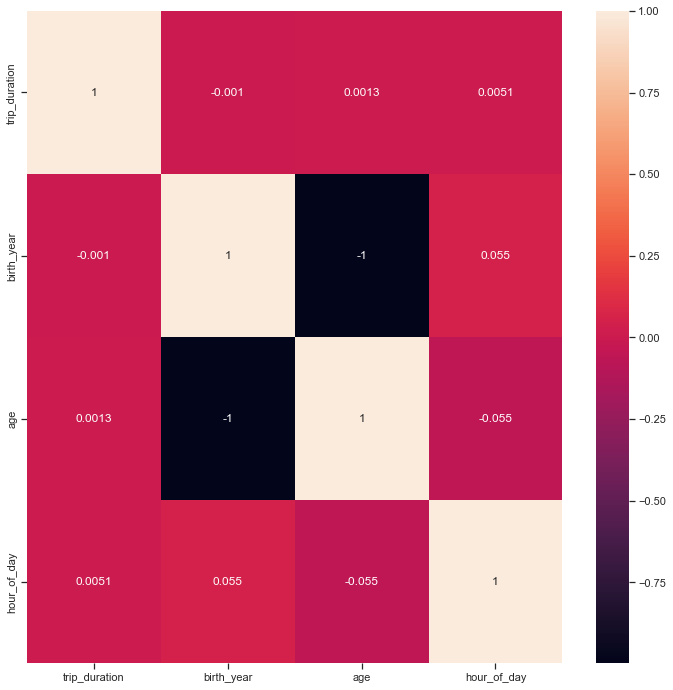

In [151]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(12,12))

# Create the correlation heatmap in seaborn

corr = sns.heatmap(subset1.corr(), annot = True, ax = ax)

### Looking at the coefficients at the correlation heatmap, it appears that there is no particular relationship, positive or negative, between between the variables.

## Step 4. Create a scatterplot (or plots) for the variables with the strongest correlations

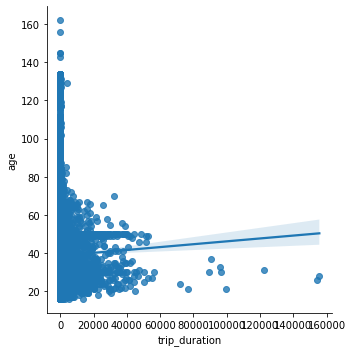

In [85]:
# Create a scatterplot for the "trip_duration" and "age" columns in seaborn

sns.lmplot(x = 'trip_duration', y = 'age', data = df_sub)

#### The scatterplot shows that as the age of the bike riders increases, the trip duration decreases. It also revealed that there are some data points that are not reasonable e.g., ages over 100. Further analysis will clarify why they appear and how best to handle them.

In [105]:
# Deleting rows where the age is over 80

df_sub.drop(df_sub[df_sub.age > 80].index, inplace=True)

/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_68189/3591676271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.drop(df_sub[df_sub.age > 80].index, inplace=True)


In [131]:
df_sub.shape

(12570179, 21)

In [140]:
# Save changes to dataframe

df_sub = df_sub

In [141]:
# Export df_sub data and df_1701_1912 to pkl
df_1701_1912.to_pickle(os.path.join(r'/Users/Dimitris/Desktop/CF Data Analytics/Data Immersion/Achievement 6/02 Data/Prepared Data/df_1701_1912.pkl'))
df_sub.to_pickle(os.path.join(r'/Users/Dimitris/Desktop/CF Data Analytics/Data Immersion/Achievement 6/02 Data/Prepared Data/df_sub.pkl'))

## Step 5. Create a pair plot of the entire data set

KeyboardInterrupt: 

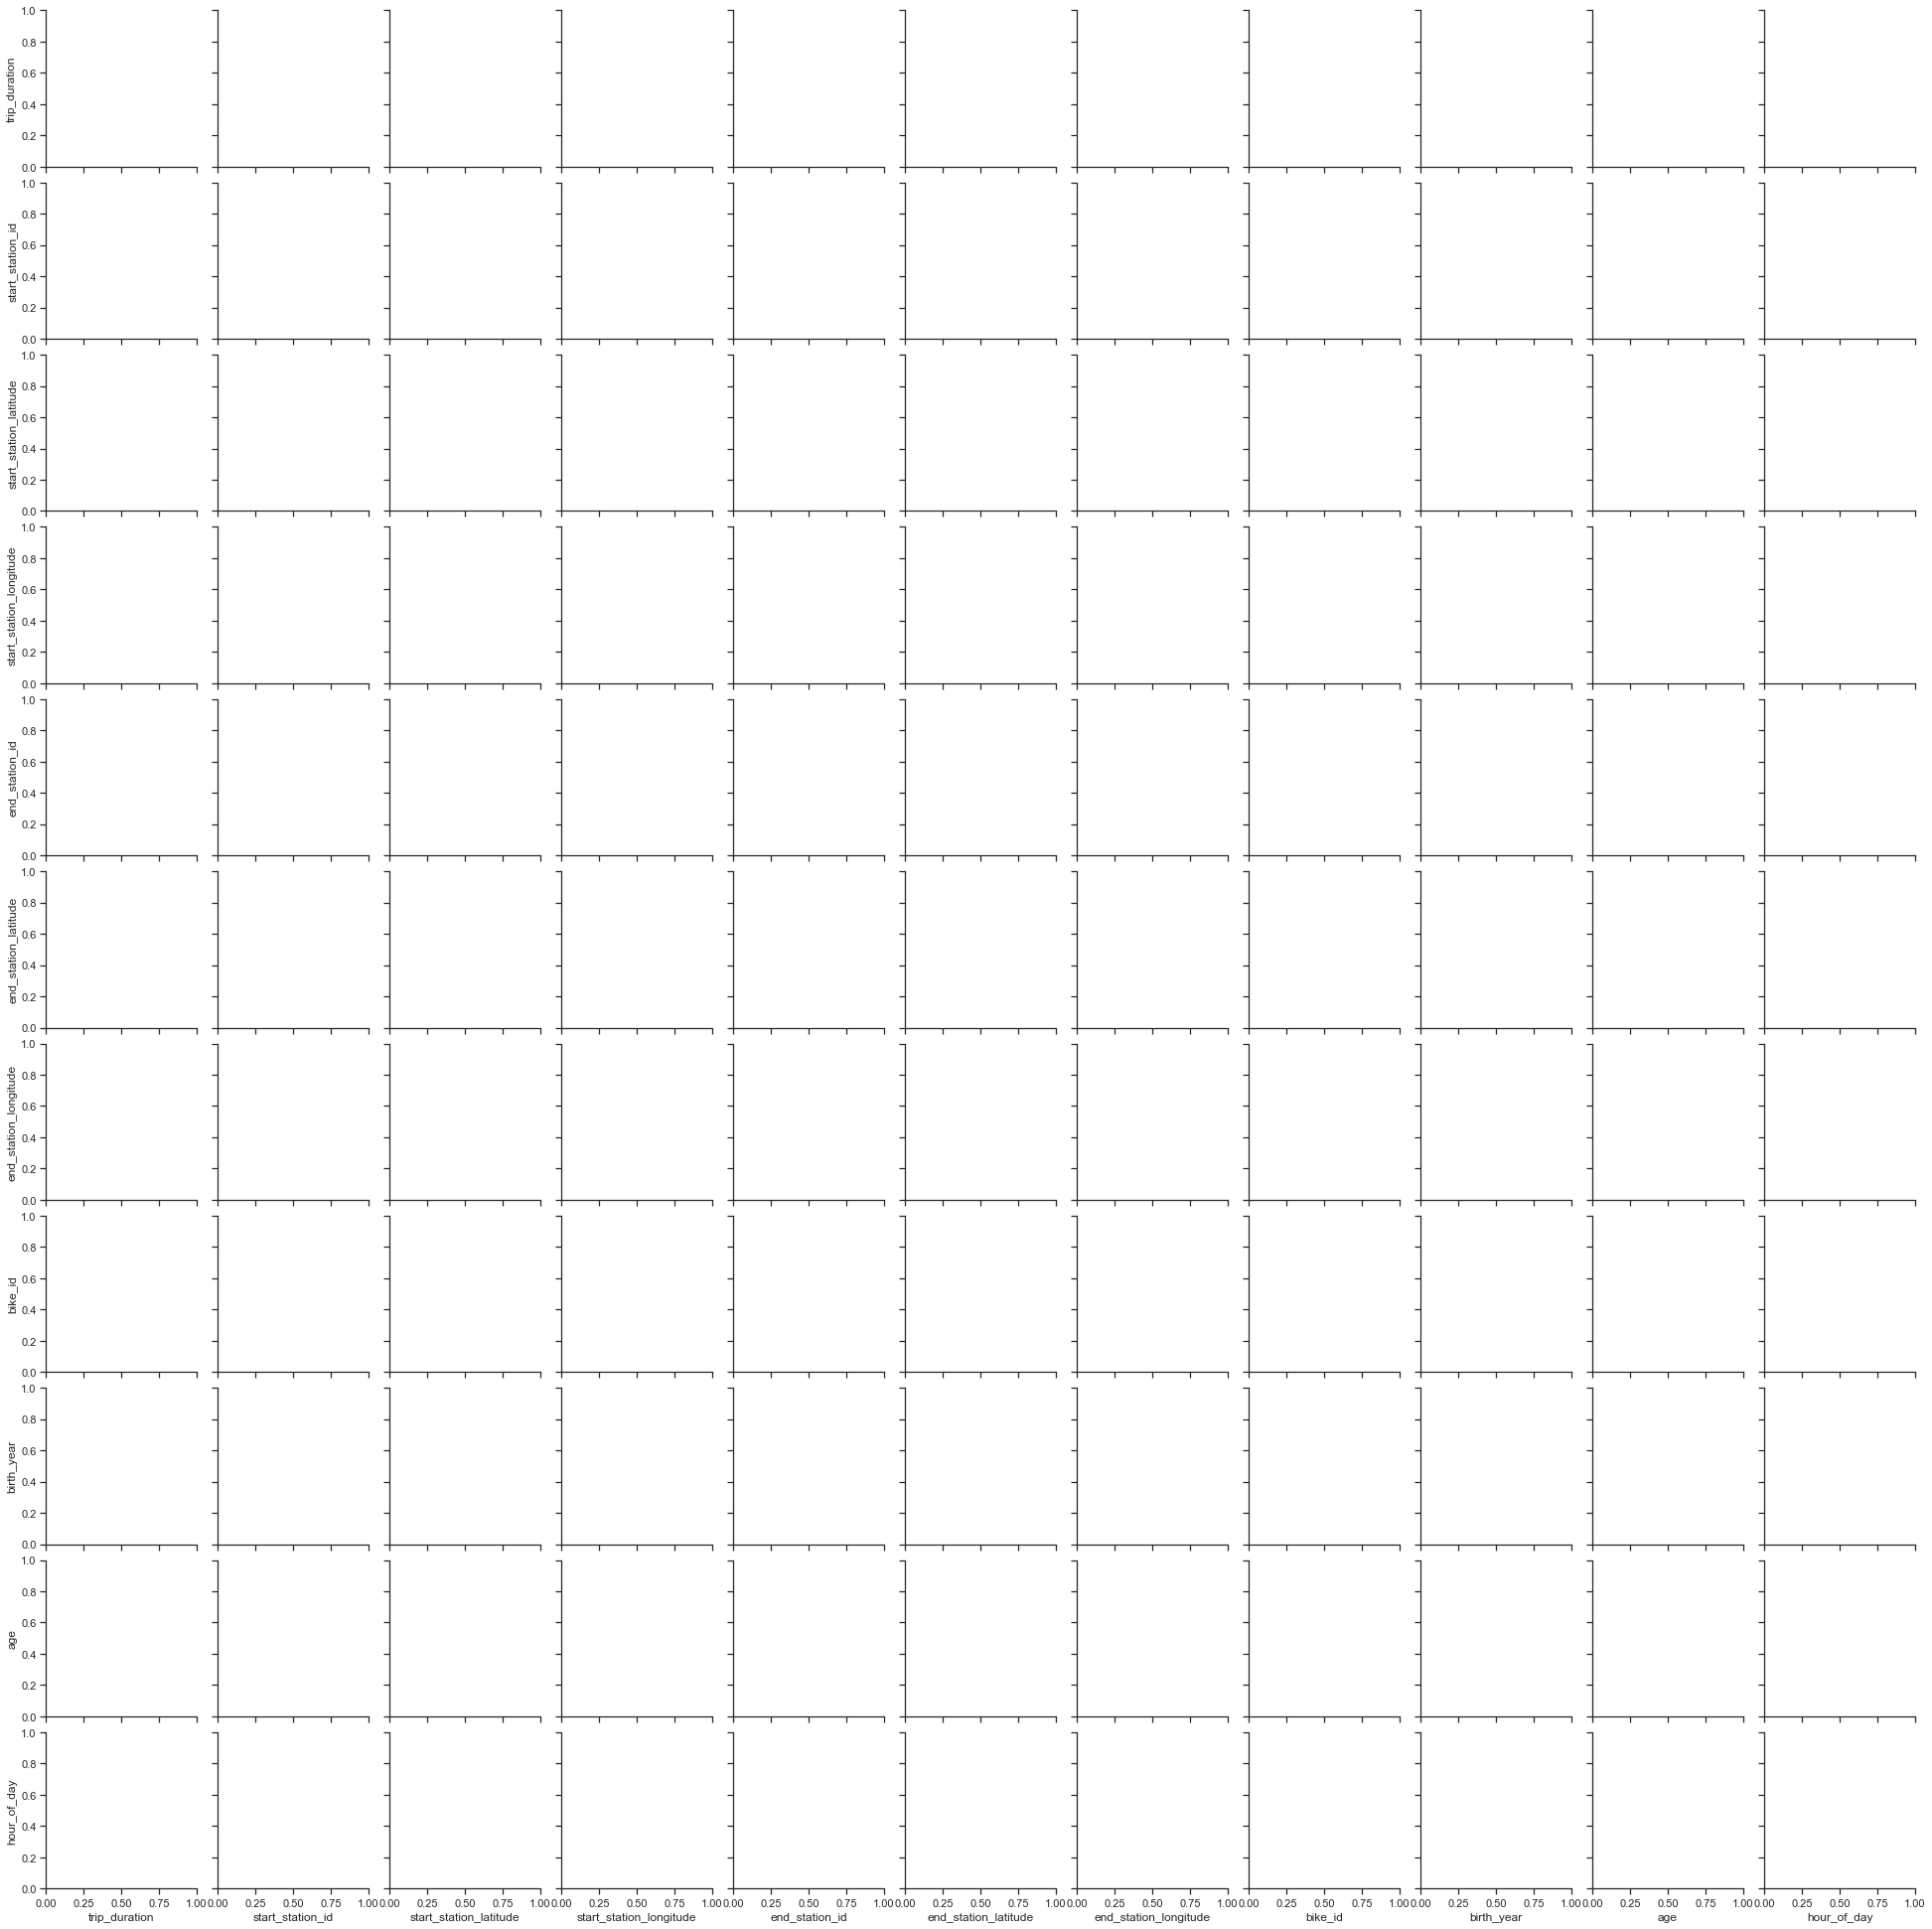

In [142]:
g = sns.pairplot(df_sub)

## Steps 6 & 7. Create a categorical plot, interpret the results and further analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

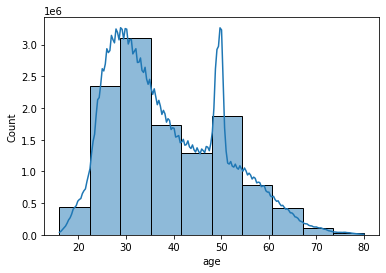

In [110]:
# Create a categorical variable that splits the "age" column into categories

sns.histplot(df_sub['age'], bins = 10, kde = True)

<AxesSubplot:xlabel='hour_of_day', ylabel='Count'>

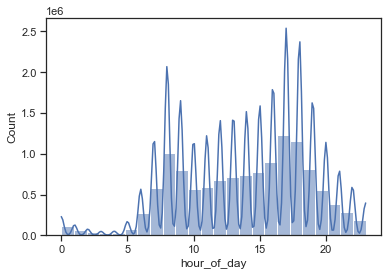

In [137]:
# Create a histogram the "time_of_day" column

sns.histplot(df_sub['hour_of_day'], bins = 24, kde = True)

<AxesSubplot:xlabel='day_of_week', ylabel='Count'>

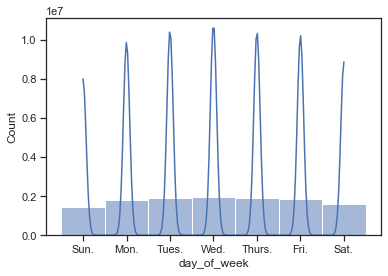

In [138]:
# Create a histogram the "day_of_week" column

sns.histplot(df_sub['day_of_week'], bins = 7, kde = True)

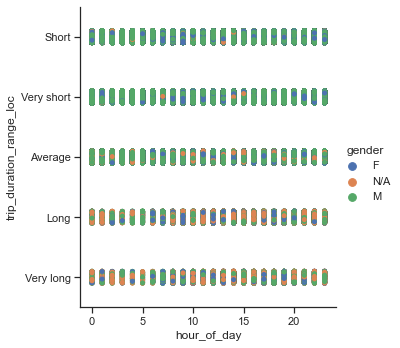

In [132]:
# Create a categorical plot in seaborn using the categories created previously

sns.set(style="ticks")
g = sns.catplot(x="hour_of_day", y="trip_duration_range_loc", hue="gender", data=df_sub)

## Analysis

#### Due to the size of the sample (>12,000,000 rows), it is not easy to interpret the results using a scatterplot. What is evident is that most riders are male, female riders take longer rides more than average ones and there is a higher proportion of missing gender data on long and very long rides.

#### The majority of the riders are between the ages of 22-42.

#### The busiest times are at 08:00 am and between the 17:00 -18:00 pm. This coincides with the usual transit hours of most workers.

#### All days of the week have high ridership numbers (>14,500,000 rides). The days with the highest ridership are Tuesday, Wednesday and Thursday. The least busy day is Sunday.

#### The most 5 popular start stations are:
#### 1. Pershing Square North
#### 2. E 17 St & Broadway
#### 3. Broadway & E 22 St
#### 4. W 21 St & 6 Ave
#### 5. West St & Chambers St

#### The most 5 popular end stations are:
#### 1. Pershing Square North
#### 2. E 17 St & Broadway
#### 3. Broadway & E 22 St
#### 4. W 21 St & 6 Ave
#### 5. West St & Chambers St

#### The start and end stations are identical, which means that these areas are very popular and the demand for bikes is high.

### It is important to note again that is a sample. Therefore, any conclusions derived from this analysis might not be 100% accurate.


## Step 8. Define any hypotheses that you can at this point

#### Hypothesis: Younger riders will rent a bike more often than older riders and will travel longer distances.